In [2]:
import numpy as np 
import scipy.interpolate 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [23]:
# Rotation, inputs are X, Y, Z, func theta(r) 
def rotateImageBy(theta, X, Y, Z):
    '''
    Inputs : 
        theta must be a function whose inputs is a radius and outputs theta at that radius 
        X, Y are 2D grids 
        Z is the image data, also 2D grid 
    '''
    # Preparation 
    R = np.sqrt(X**2 + Y**2) # 2D radius 
    thetaInitial = np.arctan2(Y, X) # initial angle 
    xx = X.flatten() # flatten all 2D array into 1D 
    yy = Y.flatten() 
    zz = Z.flatten() 
    rr = R.flatten() 
    ti = thetaInitial.flatten() 
    # Calculate rotated angle 
    xf = rr * np.cos(ti + theta(rr))
    yf = rr * np.sin(ti + theta(rr))
    zf_calculator = scipy.interpolate.interp2d(xf, yf, zz)
    return zf_calculator

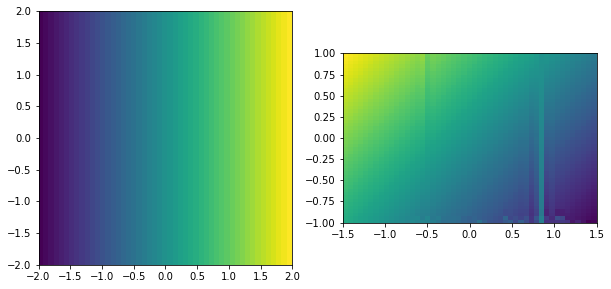

In [44]:
# Test 1 : rotation by constant amount : Try different amounts
# Screws up for -pi/4 for some reason 
# pi/2 looks a bit strange at some place 
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = X.copy() 
def theta(r): 
    # reason for ones_like is to make sure output has same length as inputted r 
    return 3*np.pi/4 * np.ones_like(r)
Zr_calculator = rotateImageBy(theta, X, Y, Z)

# New grid 
xr = np.linspace(-1.5, 1.5, 50)
yr = np.linspace(-1, 1, 50)
Xr, Yr = np.meshgrid(xr, yr)
Zr = Zr_calculator(xr, yr) # Note this takes 1D arrays 

# Plots 
fig, ax = plt.subplots(ncols=2, figsize=[10, 5])
ax[0].pcolor(X, Y, Z)
ax[0].set_aspect('equal')
ax[1].pcolor(Xr, Yr, Zr)
ax[1].set_aspect('equal')

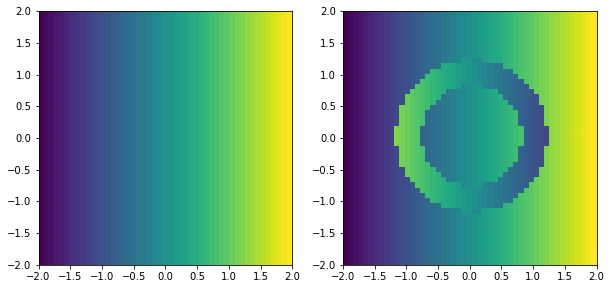

In [53]:
# Test 2 : rotation by constant amount 
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = X.copy()
def theta(r): 
    t = np.zeros_like(r)
    t[(r>0.8) & (r<1.2)] = np.pi # only rotate in a strip 
    return t
Zr_calculator = rotateImageBy(theta, X, Y, Z)

# New grid 
xr = np.linspace(-2, 2, 50)
yr = np.linspace(-2, 2, 50)
Xr, Yr = np.meshgrid(xr, yr)
Zr = Zr_calculator(xr, yr) # Note this takes 1D arrays 

# Plots 
fig, ax = plt.subplots(ncols=2, figsize=[10, 5])
ax[0].pcolor(X, Y, Z)
ax[0].set_aspect('equal')
ax[1].pcolor(Xr, Yr, Zr)
ax[1].set_aspect('equal')